In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np

from scipy import stats



In [2]:
#Establish connection with the trulia housing .db file
conn = sqlite3.connect('C:/Users/dakot/Desktop/DataScience/Project Scrap work/trulia_project/trulia_sb_house_data.db')

#read the "cleaned data" table from the trulia housing database and store in a pandas dataframe
df = pd.read_sql_query("SELECT * FROM trulia_house_SB_data_cleaned", conn)

In [3]:
#inspec the basic features of the dataset:
df.columns


Index(['level_0', 'index', 'price', 'address', 'zip', 'num_bedrooms',
       'num_baths', 'building_sqft', 'year_built', 'lot_area',
       'home_description', 'feature_list', 'house_age', 'has_garage',
       'has_fireplace', 'has_ocean_views', 'has_mountain_views',
       'has_hope_ranch', 'has_montecito', 'has_pool', 'has_upstairs', 'has_IV',
       'building_sqft_was_missing'],
      dtype='object')

In [4]:
df.head()

,level_0,index,price,address,zip,num_bedrooms,num_baths,building_sqft,year_built,lot_area,...,has_garage,has_fireplace,has_ocean_views,has_mountain_views,has_hope_ranch,has_montecito,has_pool,has_upstairs,has_IV,building_sqft_was_missing
0,0,0,3.900000,"726 El Rancho RdSanta Barbara, CA 93108",93108,3.0,3.0,2.354,1960.0,1.00,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1.780000,"8 Calle CapistranoSanta Barbara, CA 93105East ...",93105,3.0,2.0,1.395,1949.0,0.14,...,1,1,0,0,0,0,0,0,0,0
2,2,2,1.350000,"1095 Veronica Springs RdSanta Barbara, CA 9310...",93105,3.0,2.0,1.344,1972.0,0.50,...,0,1,0,0,0,0,0,0,0,0
3,3,3,2.899000,"422 Alan RdSanta Barbara, CA 93109Campanil",93109,3.0,3.0,2.558,1980.0,0.50,...,0,1,0,0,0,0,0,1,0,0
4,4,4,1.824215,"2625 Borton DrSanta Barbara, CA 93109West Mesa",93109,4.0,2.0,1.407,1959.0,0.14,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.zip.value_counts()

93108    214
93105    166
93117    118
93110    103
93103     91
93111     91
93109     68
93101     53
93067      2
Name: zip, dtype: int64

In [6]:
numeric_cols=['price', 'num_bedrooms',
       'num_baths', 'building_sqft', 'lot_area',
        'house_age', 'has_garage',
       'has_fireplace', 'has_ocean_views', 'has_mountain_views',
       'has_hope_ranch', 'has_montecito','building_sqft_was_missing']

In [7]:
pair_cols=['price', 'num_bedrooms',
       'num_baths', 'building_sqft', 'lot_area',
        'house_age']

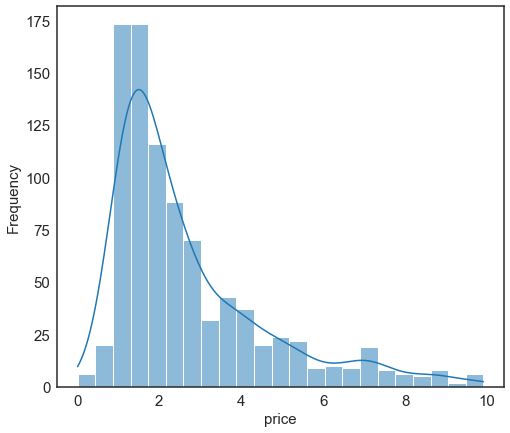

In [63]:
#look at the distribution of the target variable: price

plt.rcParams.update({'font.size': 15})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax=plt.subplots(figsize=(8,7))

sns.histplot(df['price'], ax=ax, kde=True, legend=False)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="price")

#sns.despine(trim=True, left=True)
plt.show()

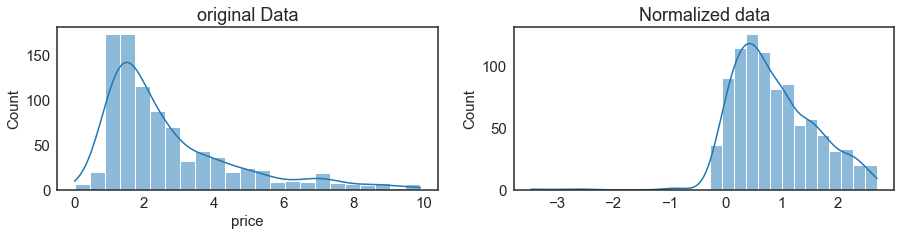

In [64]:
#The price variable is fairly right skewed. Here we see the effect of normalizing the data

normalized_data=stats.boxcox(df['price'])

fig, ax=plt.subplots(1,2,figsize=(15,3))

sns.histplot(df['price'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("original Data")

sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

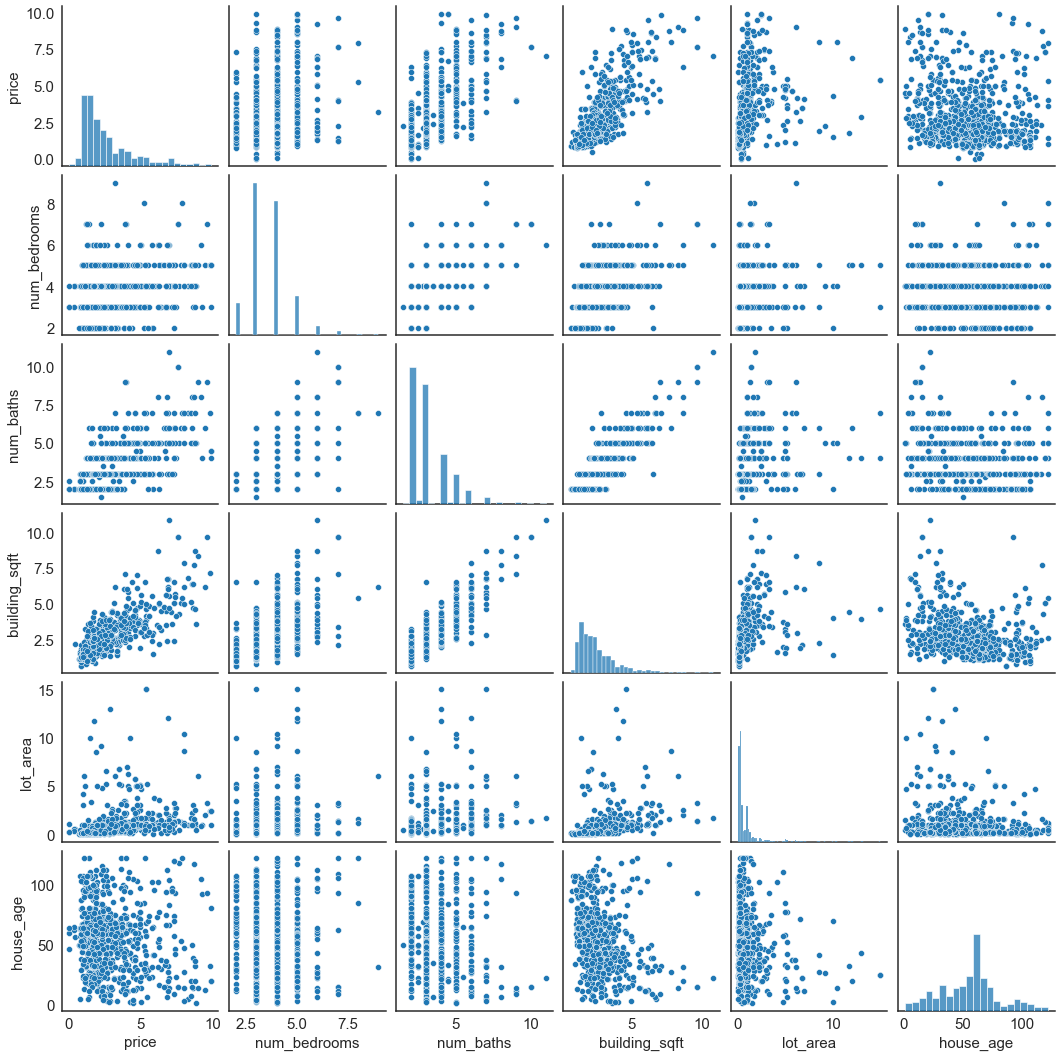

In [65]:
#We can visualize the correlation between variables using a pair plot
sns.pairplot(df[pair_cols])

<AxesSubplot:>

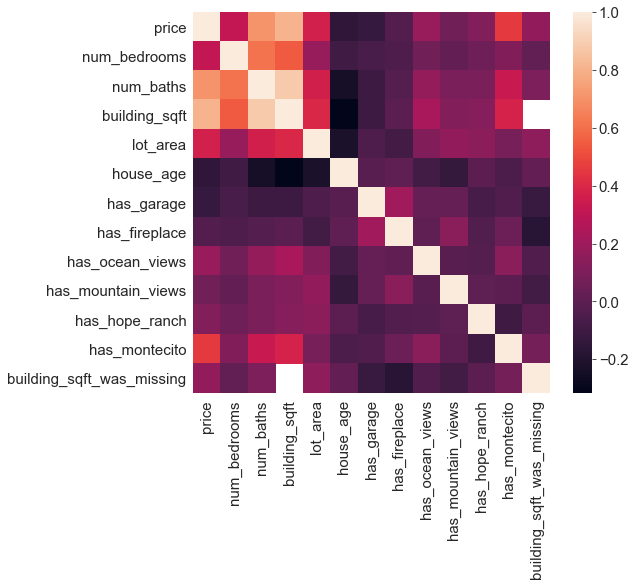

In [67]:
#visualize the corralation between numeric variables using a corralation matrix and a heat map
#df[numeric_cols].corr()
f, ax=plt.subplots(figsize=(8,7))
sns.heatmap(df[numeric_cols].corr(), annot=False)

<AxesSubplot:xlabel='house_age', ylabel='Count'>

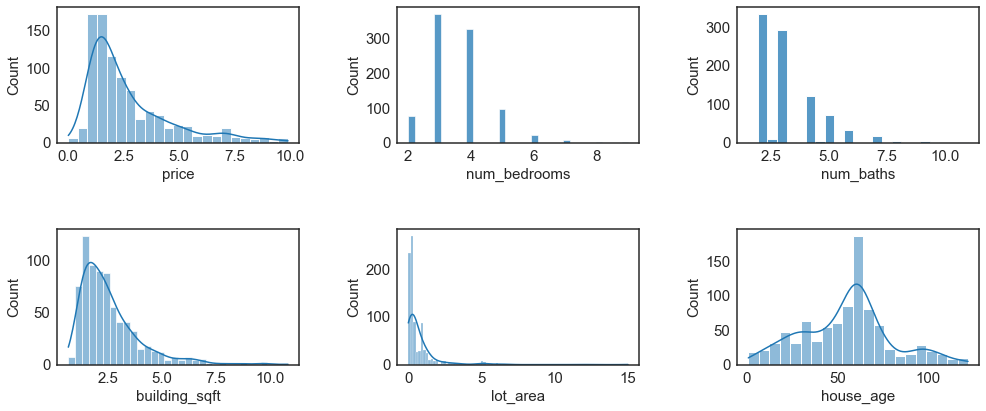

In [68]:
#Visualize the distribution of all of the numeric data in the dataframe:

fig,axes=plt.subplots(2,3,figsize=(15, 7))
fig.tight_layout(pad=4.0)

sns.histplot(df['price'], ax=axes[0,0], kde=True, legend=False)
#df.price.hist(ax=axes[0,0])
#axes[0,0].set_title(df.price.name)

sns.histplot(df['num_bedrooms'], ax=axes[0,1], kde=False, legend=False)
#df.num_bedrooms.hist(ax=axes[0,1])
#axes[0,1].set_title(df.num_bedrooms.name)

sns.histplot(df['num_baths'], ax=axes[0,2], kde=False, legend=False)
#df.num_baths.hist(ax=axes[0,2])
#axes[0,2].set_title(df.num_baths.name)

sns.histplot(df['building_sqft'], ax=axes[1,0], kde=True, legend=False)
#df.building_sqft.hist(ax=axes[1,0])
#axes[1,0].set_title(df.building_sqft.name)

sns.histplot(df['lot_area'], ax=axes[1,1], kde=True, legend=False)
#df.lot_area.hist(ax=axes[1,1])
#axes[1,1].set_title(df.lot_area.name)

sns.histplot(df['house_age'], ax=axes[1,2], kde=True, legend=False)
#df.house_age.hist(ax=axes[1,2])
#axes[1,2].set_title(df.house_age.name)

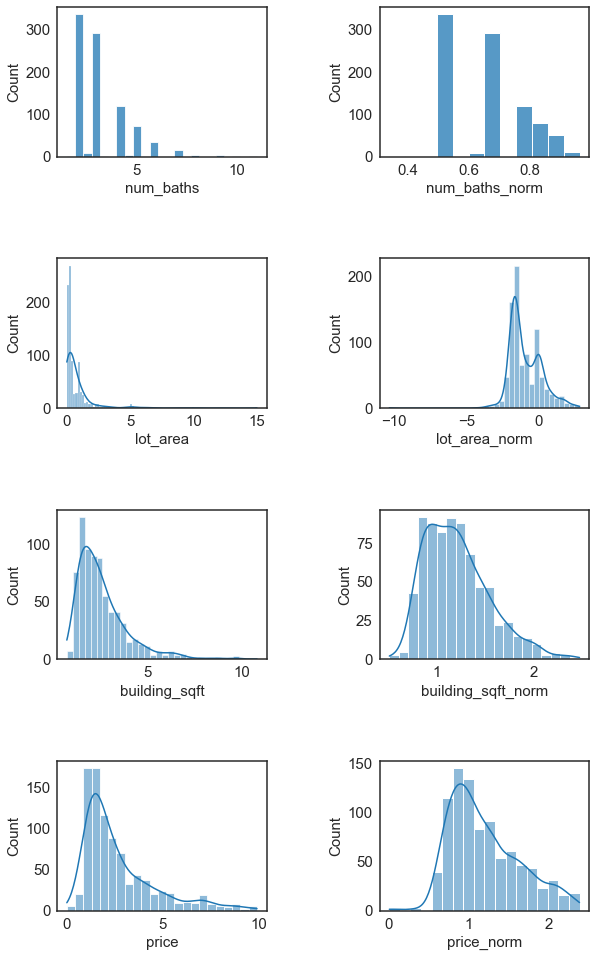

In [69]:
#Visualize the effect of normalizing all of the numeric data:

fig, ax=plt.subplots(4,2,figsize=(10,15))
fig.tight_layout(pad=5.0)


sns.histplot(df['num_baths'], ax=ax[0,0], kde=False, legend=False)

df['num_baths_norm']=stats.boxcox(df['num_baths'])[0]
sns.histplot(df['num_baths_norm'], ax=ax[0,1], kde=False, legend=False)




sns.histplot(df['lot_area'], ax=ax[1,0], kde=True, legend=False)

df['lot_area_norm']=stats.boxcox(df['lot_area'])[0]
sns.histplot(df['lot_area_norm'], ax=ax[1,1], kde=True, legend=False)



sns.histplot(df['building_sqft'], ax=ax[2,0], kde=True, legend=False)

# df['building_sqft_norm']=stats.boxcox(df['building_sqft'])[0]
df["building_sqft_norm"] = np.log1p(df["building_sqft"])
sns.histplot(df['building_sqft_norm'], ax=ax[2,1], kde=True, legend=False)


sns.histplot(df['price'], ax=ax[3,0], kde=True, legend=False)

#df['price_norm']=stats.boxcox(df['price'])[0]
df["price_norm"] = np.log1p(df["price"])
sns.histplot(df['price_norm'], ax=ax[3,1], kde=True, legend=False)

plt.show()


<AxesSubplot:>

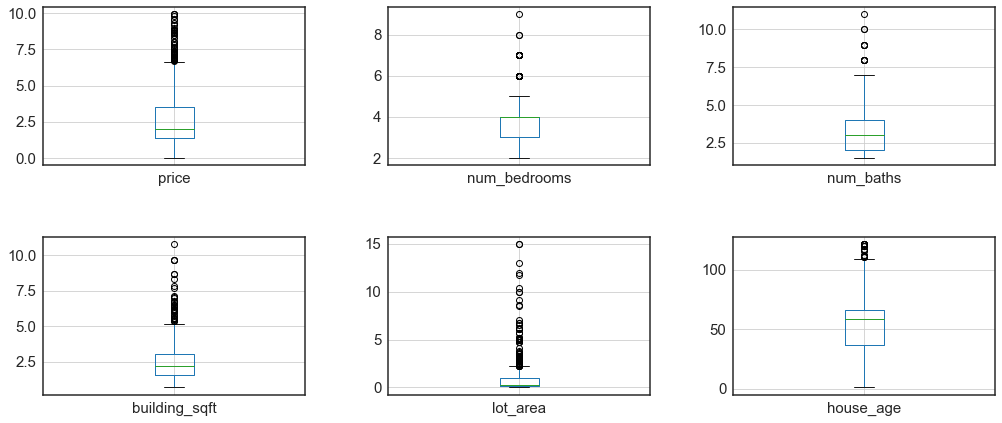

In [71]:
# visualize the distribution and outliers for all of the numeric variables using a box plot 

fig,axes=plt.subplots(2,3,figsize=(15, 7),frameon=True)
fig.tight_layout(pad=3.0)

df.boxplot(ax=axes[0,0],column='price')

df.boxplot(ax=axes[0,1],column='num_bedrooms')

df.boxplot(ax=axes[0,2],column='num_baths')

df.boxplot(ax=axes[1,0],column='building_sqft')

df.boxplot(ax=axes[1,1],column='lot_area')

df.boxplot(ax=axes[1,2],column='house_age')

<AxesSubplot:xlabel='zip', ylabel='price'>

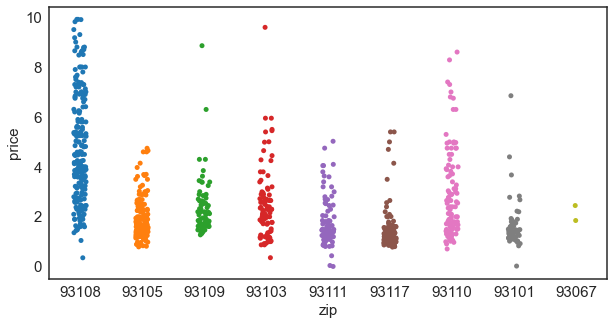

In [72]:

#Visualize the distribution of price values for different zip code categories using a catplot
#plt.rc("figure", figsize=(100, 10))
#fig=sns.catplot(x="zip", y='price', data=df)

fig, ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='zip', y='price', data=df, ax=ax)


(-0.5, 8.5, 0.0, 10.0)

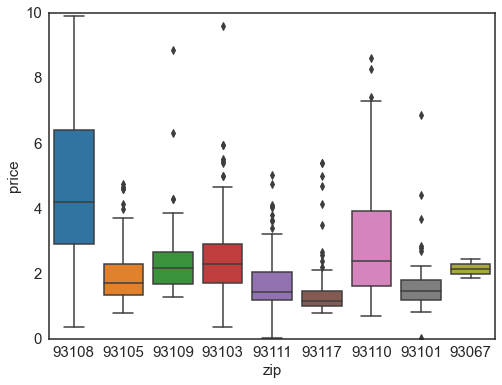

In [73]:
#Visualize the mean and std values of price for different zip code values
f, ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='zip', y='price', data=df)
fig.axis(ymin=0, ymax=10)

In [17]:
#mean value of price for each zip code value
pd.pivot_table(df, index='zip', values='price')

,price
zip,
93067,2.150000
93101,1.673449
93103,2.532628
93105,1.922125
93108,4.704511
93109,2.414750
93110,2.929883
93111,1.764168
93117,1.426758


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dakot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dakot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


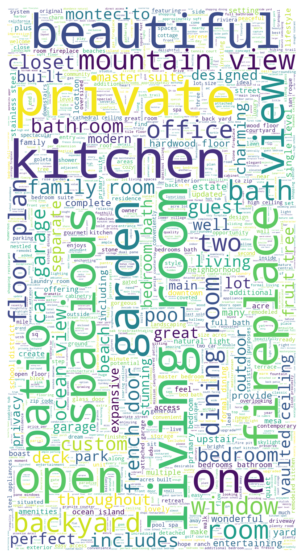

In [18]:
#construct a wordcloud to visualize the distribution of descriptor words in the "description" feature. This is used create new
#features in the data cleaning script

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#add words from the home description feature to the list of words to be used in the cloud
words=" ".join(df.home_description)

#define stop/break words for word cloud function
def punctuation_stop(text):
    filtered=[]
    stop_words=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered=punctuation_stop(words)

#Define words that should not be included in the word cloud
unwanted=['home', 'feature', 'enjoy', 'offer', 'located', 'property', 'santa', 'barbara', 'large','space','offers', 'include',
          'new', 'area', 'features', 'house']

text=" ".join([ele for ele in words_filtered if ele not in unwanted])

#call word cloud function and generate plot
wc=WordCloud(background_color="white", stopwords=STOPWORDS, max_words=2000, width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()